<a href="https://colab.research.google.com/github/A01793469/CO2MassBalance_Equipo6/blob/main/Avance1_Equipo6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

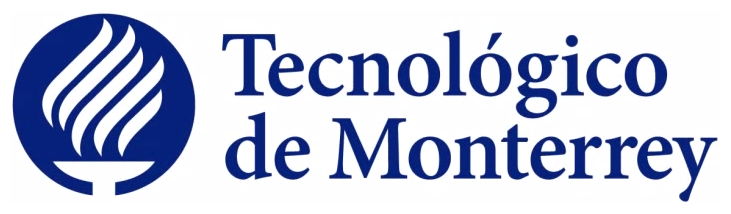

# PROYECTO INTEGRADOR: CO2 Mass Balance

# Avance 1. Análisis exploratorio de datos

# PRESENTADO POR:

## Miguel Ángel Aguilera Rodríguez - A00642541

## Carlos Jesús Peñaloza Julio - A01793931

## Alberto Patraca Sotomayor - A01793469

# PROFESORA:

##Dra. Grettel Barceló Alonso

##Dra. Eduviges Ludivina Facundo Flores

# 2.1 Elegir las características más relevantes para reducir la dimensionalidad y aumentar la capacidad de generalización del modelo.

In [1]:
# Lo primero que realizamos es importar las librerías requeridas
import os # Nos ayuda al manejo de archivos y rutas de archivos
import json  # Es de gran utilizad para manejar archivos .json
import datetime # Manejo de fechas y horas
import warnings

import numpy as np # Funcional para el manejo de matrices de datos
import pandas as pd # Muy útil para el manejo de dataframes

from google.colab import drive # Se utiliza para conectarse con drive y leer los archivos del mismo

In [2]:
pd.set_option('display.max_columns', 3000) # Cambiamos la cantidad de columnas máximas que se muestran
warnings.filterwarnings('ignore')

In [3]:
drive.mount('/content/drive') # Montamos el drive, para poder acceder al archivo del dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Definimos el folder donde se encuentran los datos y leemos el json con las
# capacidades de los tanques

data_folder = '/content/drive/MyDrive/PI - CO2 Mass Balance/data'
tank_capacity_json = 'CO2_UT_VOL_202409271421.json'

tank_capacity_path = os.path.join(data_folder, tank_capacity_json)

with open(tank_capacity_path, 'r') as json_file:
    tanks_capacities_dict = json.load(json_file)

tanks_capacities_dict

{'13': 6800,
 '14': 6800,
 '15': 6800,
 '16': 6800,
 '17': 6800,
 '18': 6800,
 '19': 6800,
 '20': 6800,
 '21': 6800,
 '22': 6800,
 '23': 2200,
 '24': 2200,
 '25': 2200,
 '26': 2200,
 '27': 6800,
 '28': 6800,
 '29': 6800,
 '30': 6800,
 '31': 6800,
 '32': 6800,
 '33': 6800,
 '34': 6800,
 '35': 6800,
 '36': 6800,
 '37': 2100,
 '38': 2100,
 '39': 2100,
 '40': 2100,
 '41': 4100,
 '42': 8600,
 '43': 8600,
 '44': 8600,
 '45': 8600,
 '46': 8600,
 '47': 8600,
 '48': 8600,
 '49': 8600,
 '50': 4100}

# El diccionario es información sencilla de observar, ya que son pocos valores y con relación 1 a 1, por lo que el análisis es sencillo, notamos que no hay valores erróneos (atípicos, nulos, o en formato incorrecto)

In [5]:
# Leemos el dataset de los registros de los tanques, con las fechas e informaación.

registers_name = 'CO2_Connection_202409271420.csv'
registers_path = os.path.join(data_folder, registers_name)

registers_df = pd.read_csv(registers_path)

registers_df.head()

,UT,Brand,FillingStart,FillingEnd,ConnStart,ConnEnd
0,13,Amstel Utra,2022-04-12 11:43:00,2022-04-12 22:05:00,2022-04-13 13:00:00,2022-04-17 11:00:00
1,13,Carta Blanca,2022-01-17 15:49:00,2022-01-18 00:59:00,2022-01-18 19:00:00,2022-01-22 09:00:00
2,13,Carta Blanca,2022-03-21 06:21:00,2022-03-21 15:47:00,2022-03-22 17:00:00,2022-03-26 02:34:00
3,13,Carta Blanca,2022-04-22 04:32:00,NaN,2022-04-23 05:12:00,2022-04-28 06:00:00
4,13,Carta Blanca,2022-05-27 07:50:00,2022-05-27 16:05:00,2022-05-28 07:00:00,2022-06-01 05:36:00


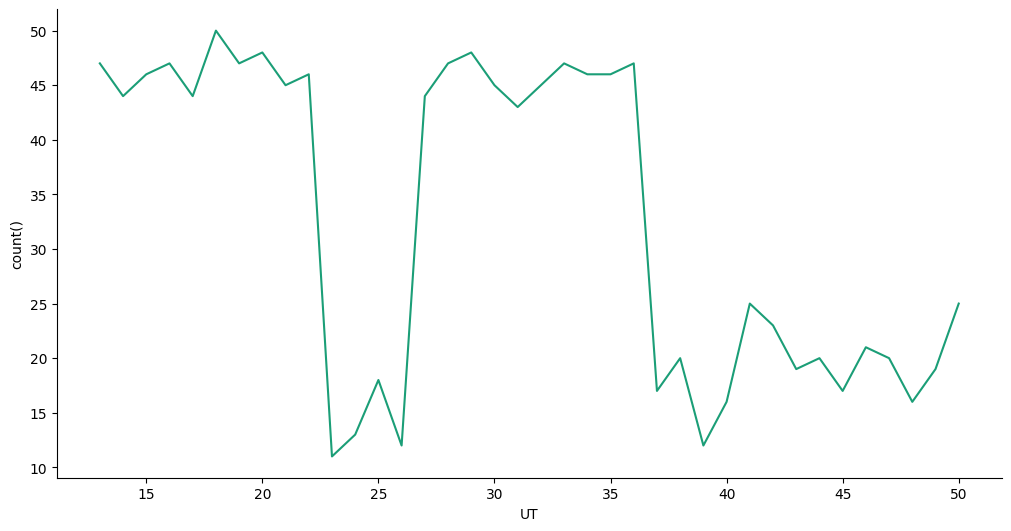

In [6]:
# @title UT vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['UT']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'UT'}, axis=1)
              .sort_values('UT', ascending=True))
  xs = counted['UT']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = registers_df.sort_values('UT', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('UT')
_ = plt.ylabel('count()')

In [7]:
registers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   UT            1246 non-null   int64 
 1   Brand         1246 non-null   object
 2   FillingStart  1246 non-null   object
 3   FillingEnd    1231 non-null   object
 4   ConnStart     1220 non-null   object
 5   ConnEnd       1186 non-null   object
dtypes: int64(1), object(5)
memory usage: 58.5+ KB


Notamos que contamos con 4 columnas referentes a fechas, de las cuales solo nos interesan la de Inicio y Fin de conexión. Los de llenado no son tan relevantes.

In [8]:
registers_df.dtypes

,0
UT,int64
Brand,object
FillingStart,object
FillingEnd,object
ConnStart,object
ConnEnd,object


In [9]:
#Imprimimos el tamaño del dataframe
registers_df.shape

(1246, 6)

Podemos notar que tenemos dos (2) variables categóricas: el UT y Brand (Marca) por lo que procedemos a obtener sus cardinalidades.

Respecto al UT, no consideramos corroborar la cardinalidad de dicha información, debido a que posteriormente no lo utilizaremos, convirtiéndolo en la capacidad del tanque, que es lo que realmente nos interesa y donde sí podemos manejar esa información.

In [10]:
registers_df.Brand.unique()

array(['Amstel Utra', 'Carta Blanca', 'Coors Light', 'Miller', 'Sol',
       'Tecate', 'Tecate Light', 'RIZZOS', 'TKT R', 'TTKL', 'Bohemia',
       'TK', 'TKTL 6', 'RIZOS', 'Noche Buena'], dtype=object)

Observamos las 15 opciones. Sin embargo, notamos que hay varias que son las mismas, pero con diferentes nombres, procedemos a unificarlas.

In [11]:
registers_df.Brand.value_counts()

,count
Brand,
Tecate Light,546
Sol,196
Tecate,150
Carta Blanca,145
Miller,73
Amstel Utra,72
Coors Light,42
Bohemia,10
Noche Buena,4


Realmente en este punto, no es de valor realizar análisis estadísticos en esta base de datos, debido a que la mayor cantidad de datos son fechas, y los otros son básicamente los nombres de los tanques.

In [12]:
# Finalmente, leemos el archivo de los registros de flujo de CO2 en la sección de producción
flow_name = 'co2_flow_measurements_2.csv'
flow_path = os.path.join(data_folder, flow_name)

flow_df = pd.read_csv(flow_path)
flow_df.head(10)

,datetime,CO2 flow(l)
0,02/08/2022 00:00:00,7.707372
1,02/08/2022 00:00:10,13.385778
2,02/08/2022 00:00:20,19.243062
3,02/08/2022 00:00:30,14.363436
4,02/08/2022 00:00:40,16.766755
5,02/08/2022 00:00:50,12.606885
6,02/08/2022 00:01:00,7.958627
7,02/08/2022 00:01:10,7.615287
8,02/08/2022 00:01:20,12.340372
9,02/08/2022 00:01:30,5.073956


In [13]:
flow_df.dtypes

,0
datetime,object
CO2 flow(l),float64


In [14]:
# Imprimimos el tamaño de este dataframe
flow_df.shape

(1382400, 2)

Podemos notar que este dataset es más compacto, en términos de elementos, pero posee mayor cantidad de datos en esa única columna. Sin embargo, al ser un elemento numérico, podemos obtener ciertas estadísticas de este.

Además, esa única columna es de las más importantes, ya que es el objetivo de nuestro proyecto, poder predecir el flujo o generación de CO2.

In [15]:
# Obtenemos algunas estadísticas de la columna de flujo
flow_df.describe()

,CO2 flow(l)
count,1.382400e+06
mean,1.504302e+01
std,5.812277e+00
min,4.970019e+00
25%,1.001562e+01
50%,1.503806e+01
75%,2.008028e+01
max,2.510999e+01


También podemos notar que en este rubro, tenemos una gran dependencia temporal, nuestra producción depende enteramente del tiempo que transcurra, además de factores que ya conocemos como la cantidad de cerveza conectada a la sección de producción, y su tipo.

En resumen, podemos definir las siguientes características de interés:


*   Capacidad de cada tanque
*   Marca de cerveza
*   Fecha y hora de inicio de conexión de los tanques a la producción de CO2
*   Fecha y hora de fin de conexión de los tanques a la producción de CO2
*   Flujo de CO2 por segundo
*   Número de tanque
*   Fecha y hora del fin de llenado, usado como referencia para la edad



# 2.2 Abordar y corregir los problemas identificados en los datos.

En primera instancia, sabemos que en el diccionario de capacidades, no tenemos ningún dato nulo o erróneo, procederemos con los dataframes.

In [16]:
registers_df.isna().sum()

,0
UT,0
Brand,0
FillingStart,0
FillingEnd,15
ConnStart,26
ConnEnd,60


In [17]:
registers_df.isnull().sum()

,0
UT,0
Brand,0
FillingStart,0
FillingEnd,15
ConnStart,26
ConnEnd,60


Con lo anterior podemos demostrar que poseemos datos nulos y erróneos, que seguramente son los mismos, únicamente que duplicados. Nuestra decisión de cómo manejaros es simplemente quitar los registros con este tipo de datos y observar cuántos registros totales realmente se eliminan (ya que varios pueden encontrarse en los mismos renglones)

In [18]:
registers_df.dropna(inplace=True)
registers_df.shape

(1162, 6)

In [19]:
registers_df.isna().sum()

,0
UT,0
Brand,0
FillingStart,0
FillingEnd,0
ConnStart,0
ConnEnd,0


In [20]:
registers_df.isnull().sum()

,0
UT,0
Brand,0
FillingStart,0
FillingEnd,0
ConnStart,0
ConnEnd,0


Perdimos 84 registros (alrededor de un 6% del dataset original), no consideramos que sea mucha la información perdida, y procedemos de esta manera.

In [21]:
registers_df.Brand.value_counts()

,count
Brand,
Tecate Light,513
Sol,193
Tecate,139
Carta Blanca,131
Miller,67
Amstel Utra,62
Coors Light,39
Bohemia,7
Noche Buena,4


In [22]:
registers_df.replace('TTKL', 'Tecate Light', inplace=True)
registers_df.replace('TKTL 6', 'Tecate Light', inplace=True)
registers_df.replace('TK', 'Tecate', inplace=True)
registers_df.replace('TKT R', 'Tecate', inplace=True)

In [23]:
registers_df.Brand.value_counts()

,count
Brand,
Tecate Light,516
Sol,193
Tecate,141
Carta Blanca,131
Miller,67
Amstel Utra,62
Coors Light,39
Bohemia,7
Noche Buena,4


Luego de la eliminación de datos nulos y de clases repetidas (con diferente nombre) terminamos con una cardinalidad de 10 en las marcas, donde podemos notar claramente que la distribución no es pareja. Hay gran diferencia entre cada escalón de las marcas.

In [24]:
flow_df.isna().sum()

,0
datetime,0
CO2 flow(l),0


In [25]:
flow_df.isnull().sum()

,0
datetime,0
CO2 flow(l),0


Comprobamos que tampoco tenemos datos erróneos ni nulos en nuestro dataframe de flujo.

# En este punto, aún no podemos obtener correlaciones, en cada tabla hay pocos datos numéricos, por lo que por separado no hay ninguna relación que los ubique, aún debemos agrupar los datos.
# Al ubicarlos en un mismo dataframe donde tengamos todas y únicamente nuestras variables de interés, ahí realizaremos un análisis más exhaustivo en términos de correlación y modificaciones que tengamos que hacer, esto lo realizaremos en la siguiente entrega. En primera instancia consideramos que lógicamente, debe haber una correlación directa fuerte entre la cantidad de cerveza total que se encuentra en los tanques que suministran, y la cantidad de CO2 producida.


**Revisión de la correlación entre UT y Volumen**

<Axes: >

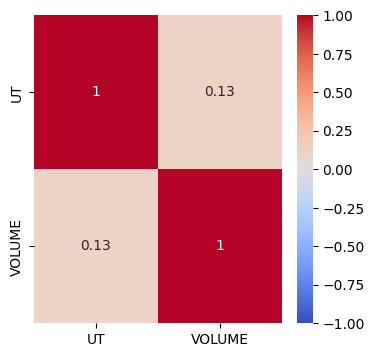

In [26]:
tanks_capacities_df = pd.read_csv('/content/drive/MyDrive/PI - CO2 Mass Balance/data/CO2_UT_VOL_202409271421.csv')
correlation_matrix = tanks_capacities_df.corr()

plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)